This notebook contains an example for teaching.

## Introduction

In labor economics an important question is what determines the wage of workers. This is a causal question,
but we could begin to investigate from a predictive perspective.

In the following wage example, $Y$ is the hourly wage of a worker and $X$ is a vector of worker's characteristics, e.g., education, experience, gender. Two main questions here are:


* How to use job-relevant characteristics, such as education and experience, to best predict wages?

* What is the difference in predicted wages between men and women with the same job-relevant characteristics?

In this lab, we focus on the prediction question first.

## Data


The data set we consider is from the March Supplement of the U.S. Current Population Survey, year 2015.  We select white non-hispanic individuals, aged 25 to 64 years, and working more than 35 hours per week during at least 50 weeks of the year. We exclude self-employed workers; individuals living in group quarters; individuals in the military, agricultural or private household sectors;  individuals with inconsistent reports on earnings and employment status; individuals with allocated or missing information in any of the variables used in the analysis; and individuals with hourly wage below $3$. 

The variable of interest $Y$ is the hourly wage rate constructed as the ratio of the annual earnings to the total number of hours worked, which is constructed in turn as the product of number of weeks worked and the usual number of hours worked per week. In our analysis, we also focus on single (never married) workers. The final sample is of size $n=5150$.

## Data analysis

We start by loading the data set.

In [220]:
load("../../../data/wage2015_subsample_inference.Rdata")
dim(data)

[1] 5150   20

Let's have a look at the structure of the data.

In [221]:
str(data)
data1 <- data

'data.frame':	5150 obs. of  20 variables:
 $ wage : num  9.62 48.08 11.06 13.94 28.85 ...
 $ lwage: num  2.26 3.87 2.4 2.63 3.36 ...
 $ sex  : num  1 0 0 1 1 1 1 0 1 1 ...
 $ shs  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ hsg  : num  0 0 1 0 0 0 1 1 1 0 ...
 $ scl  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ clg  : num  1 1 0 0 1 1 0 0 0 1 ...
 $ ad   : num  0 0 0 1 0 0 0 0 0 0 ...
 $ mw   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ so   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ we   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ne   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ exp1 : num  7 31 18 25 22 1 42 37 31 4 ...
 $ exp2 : num  0.49 9.61 3.24 6.25 4.84 ...
 $ exp3 : num  0.343 29.791 5.832 15.625 10.648 ...
 $ exp4 : num  0.24 92.35 10.5 39.06 23.43 ...
 $ occ  : Factor w/ 369 levels "10","20","40",..: 159 136 269 23 99 86 226 232 184 146 ...
 $ occ2 : Factor w/ 22 levels "1","2","3","4",..: 11 10 19 1 6 5 17 17 13 10 ...
 $ ind  : Factor w/ 236 levels "370","380","390",..: 204 117 12 165 231 176 171 135 210 201 ...
 $ ind2 : Factor w/ 

### Cleaning data

Focus on people who did not go to college. The variable `shs (Some High School)` and `hsg (High School Graduate)` help us to identify people that did not go to college.

In [222]:
attach(data1)

The following objects are masked from data1 (pos = 4):

    ad, clg, exp1, exp2, exp3, exp4, hsg, ind, ind2, lwage, mw, ne,
    occ, occ2, scl, sex, shs, so, wage, we

The following objects are masked from data1 (pos = 5):

    ad, clg, exp1, exp2, exp3, exp4, hsg, ind, ind2, lwage, mw, ne,
    occ, occ2, scl, sex, shs, so, wage, we

The following objects are masked from data1 (pos = 6):

    ad, clg, exp1, exp2, exp3, exp4, hsg, ind, ind2, lwage, mw, ne,
    occ, occ2, scl, sex, shs, so, wage, we

The following objects are masked from data1 (pos = 7):

    ad, clg, exp1, exp2, exp3, exp4, hsg, ind, ind2, lwage, mw, ne,
    occ, occ2, scl, sex, shs, so, wage, we

The following objects are masked from data1 (pos = 10):

    ad, clg, exp1, exp2, exp3, exp4, hsg, ind, ind2, lwage, mw, ne,
    occ, occ2, scl, sex, shs, so, wage, we



In [223]:
data = data1[ shs == 1 | hsg == 1, ]

We are constructing the output variable $Y$ and the matrix $Z$ which includes the characteristics of workers that are given in the data.

In [224]:
Y <- data$lwage
n <- length(Y)
Z <- data[-which(colnames(data) %in% c("wage","lwage"))]
p <- dim(Z)[2]

cat("Number of observation:", n, '\n')
cat( "Number of raw regressors:", p)

Number of observation: 1376 
Number of raw regressors: 18

For the outcome variable *wage* and a subset of the raw regressors, we calculate the empirical mean to get familiar with the data.

In [225]:
library(xtable)
options(xtable.floating = FALSE)
options(xtable.timestamp = "")

## Prediction Question

Now, we will construct a prediction rule for hourly wage $Y$, which depends linearly on job-relevant characteristics $X$:

\begin{equation}\label{decompose}
Y = \beta'X+ \epsilon.
\end{equation}

Our goals are

* Predict wages  using various characteristics of workers.

* Assess the predictive performance using the (adjusted) sample MSE, the (adjusted) sample $R^2$ and the out-of-sample MSE and $R^2$.


We employ two different specifications for prediction:


1. Basic Model:   $X$ consists of a set of raw regressors (e.g. gender, experience, education indicators,  occupation and industry indicators, regional indicators).


2. Flexible Model:  $X$ consists of all raw regressors from the basic model plus occupation and industry indicators, transformations (e.g., ${exp}^2$ and ${exp}^3$) and additional two-way interactions of polynomial in experience with other regressors. An example of a regressor created through a two-way interaction is *experience* times the indicator of having a *college degree*.

Using the **Flexible Model**, enables us to approximate the real relationship by a
 more complex regression model and therefore to reduce the bias. The **Flexible Model** increases the range of potential shapes of the estimated regression function. In general, flexible models often deliver good prediction accuracy but give models which are harder to interpret.

Now, let us fit both models to our data by running ordinary least squares (ols):

In [230]:
regbasic.est <- summary(regbasic)$coef
regbasic.est
#["sex"]

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.8330066440,0.139278787,20.340546431,2.768848e-80
sex,-0.0733094463,0.031443112,-2.331494580,1.987625e-02
exp1,0.0075741692,0.001251476,6.052187615,1.855944e-09
shs,-0.0811341857,0.045497681,-1.783259808,7.477235e-02
mw,-0.0431881740,0.036201376,-1.192998132,2.330832e-01
so,-0.1091619890,0.035889072,-3.041649796,2.398976e-03
we,0.0129620156,0.039542039,0.327803418,7.431120e-01
occ22,-0.1961260941,0.135884963,-1.443324481,1.491649e-01
occ23,-0.0086113464,0.160966266,-0.053497833,9.573433e-01
occ24,0.0005078397,0.141271396,0.003594781,9.971323e-01


In [232]:
# 1. basic model
basic <- lwage~ (sex + exp1 + shs + hsg + mw + so + we + occ2+ ind2)
regbasic <- lm(basic, data=data)

regbasic.est <- summary(regbasic)$coef["sex",1]

HCV.coefs <- vcovHC(regbasic, type = 'HC');
regbasic.se <- sqrt(diag(HCV.coefs))['sex'] # Estimated std errors
cat( "Number of regressors in the basic model:",length(regbasic$coef), '\n') # number of regressors in the Basic Model


Number of regressors in the basic model: 49 


The `lm` function drops three variables hsg, scl and clg. We have to take this into account since Python does not drop these variables because it does not use the QR decomposition as R does. We shall have to drop the variables manually.

% ##### Note that the basic model consists of $48$ regressors. Three regressors were dropped out.

In [214]:
library(sandwich)

# 2. flexible model
flex <- lwage ~ sex + (exp1+exp2+exp3+exp4+shs+hsg+occ2+ind2+mw+so+we)^2
regflex <- lm(flex, data=data)
regflex.est <- summary(regflex)$coef["sex",1]

HCV.coefs <- vcovHC(regflex, type = 'HC');
regflex.se <- sqrt(diag(HCV.coefs))['sex'] # Estimated std errors


Call:
lm(formula = flex, data = data)

Coefficients:
  (Intercept)            sex           exp1           exp2           exp3  
    1.616e+01     -8.833e-02     -3.404e+00      3.827e+01     -2.073e+01  
         exp4            shs            hsg          occ22          occ23  
    6.983e+00     -6.386e-01             NA     -2.543e+00     -4.076e+01  
        occ24          occ25          occ26          occ27          occ28  
    7.848e+00     -5.326e+01      2.041e+01      1.894e+00     -1.016e+01  
        occ29         occ210         occ211         occ212         occ213  
   -2.071e+01     -3.932e+00      3.123e-01      1.845e+00     -2.104e+00  
       occ214         occ215         occ216         occ217         occ218  
   -1.179e+00     -1.081e+01     -1.757e-01     -4.729e+00     -3.364e-01  
       occ219         occ220         occ221         occ222          ind23  
   -6.760e+00     -2.967e+00     -1.216e+00     -2.021e+00     -1.674e+01  
        ind24          ind25      

In [215]:
cat( "Number of regressors in the flexible model:",length( regflex$coef ) ) # number of regressors in the Flexible Model

Number of regressors in the flexible model: 877

In [241]:
library(lmtest)

table<- matrix(0, 2, 4)
table[1,1]<- regbasic.est  
table[1,2]<- regbasic.se   
table[2,1]<- regflex.est
table[2,2]<- regflex.se    
table[1,3]<- coefci(regbasic, df = Inf, vcov. = vcovHC, type = "HC")[2,1] 
table[1,4]<- coefci(regbasic, df = Inf, vcov. = vcovHC, type = "HC")[2,2] 
table[2,3]<- coefci(regflex, df = Inf, vcov. = vcovHC, type = "HC")[2,1] 
table[2,4]<- coefci(regflex, df = Inf, vcov. = vcovHC, type = "HC")[2,2] 

colnames(table)<- c("Estimate","se","lower_bound","upper_bound")
rownames(table)<- c("OLS", "OLS flexible")
tab<- xtable(table)
tab

,Estimate,se,lower_bound,upper_bound
OLS,-0.07330945,0.03219491,-0.1364103,-0.01020858
OLS flexible,-0.08832947,0.03446122,-0.1558722,-0.02078671


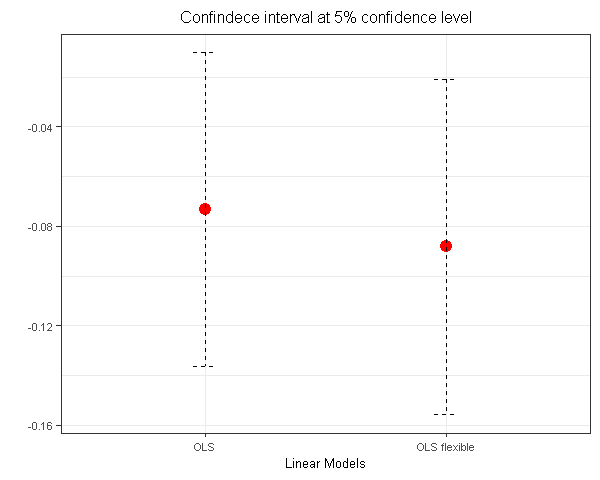

In [261]:
library(ggplot2)

options(repr.plot.width = 5, repr.plot.height =4)  # plot size 

ggplot(tab, aes(x=rownames(tab), y=Estimate)) +
    geom_point(size=3, color="red") + 
    geom_errorbar(aes(ymin=lower_bound, ymax=upper_bound) , width = 0.1,color="black", linetype="dashed", size=0.5) +
  labs(x="Linear Models", y="") + ggtitle("Confindece interval at 5% confidence level") +
  theme_bw()  + theme(text=element_text(size =8), plot.title = element_text(hjust = 0.5))

### Selecting column names that are not NAN

In [171]:
names_variables_na_flex <- attributes(regflex$coef)$names[ !is.na( regflex$coef ) ]
names_variables_na_flex

df_flex <- model.matrix(regflex)

clean_data_flex <- df_flex[ , names_variables_na_flex ]

[1] "(Intercept)"   "sex"           "exp1"          "exp2"         
  [5] "exp3"          "exp4"          "shs"           "occ22"        
  [9] "occ23"         "occ24"         "occ25"         "occ26"        
 [13] "occ27"         "occ28"         "occ29"         "occ210"       
 [17] "occ211"        "occ212"        "occ213"        "occ214"       
 [21] "occ215"        "occ216"        "occ217"        "occ218"       
 [25] "occ219"        "occ220"        "occ221"        "occ222"       
 [29] "ind23"         "ind24"         "ind25"         "ind26"        
 [33] "ind27"         "ind28"         "ind29"         "ind210"       
 [37] "ind211"        "ind212"        "ind213"        "ind214"       
 [41] "ind215"        "ind216"        "ind217"        "ind218"       
 [45] "ind219"        "ind220"        "ind221"        "ind222"       
 [49] "mw"            "so"            "we"            "exp1:exp4"    
 [53] "exp1:shs"      "exp1:occ22"    "exp1:occ23"    "exp1:occ24"   
 [57] "exp1:occ25"    "exp1:occ26"    "exp1:occ27"    "exp1:occ28"   
 [61] "exp1:occ29"    "exp1:occ210"   "exp1:occ211"   "exp1:occ212"  
 [65] "exp1:occ213"   "exp1:occ214"   "exp1:occ215"   "exp1:occ216"  
 [69] "exp1:occ217"   "exp1:occ218"   "exp1:occ219"   "exp1:occ220"  
 [73] "exp1:occ221"   "exp1:occ222"   "exp1:ind23"    "exp1:ind24"   
 [77] "exp1:ind25"    "exp1:ind26"    "exp1:ind27"    "exp1:ind28"   
 [81] "exp1:ind29"    "exp1:ind210"   "exp1:ind211"   "exp1:ind212"  
 [85] "exp1:ind213"   "exp1:ind214"   "exp1:ind215"   "exp1:ind216"  
 [89] "exp1:ind217"   "exp1:ind218"   "exp1:ind219"   "exp1:ind220"  
 [93] "exp1:ind221"   "exp1:ind222"   "exp1:mw"       "exp1:so"      
 [97] "exp1:we"       "exp2:exp4"     "exp2:shs"      "exp2:occ22"   
[101] "exp2:occ23"    "exp2:occ24"    "exp2:occ25"    "exp2:occ26"   
[105] "exp2:occ27"    "exp2:occ28"    "exp2:occ29"    "exp2:occ210"  
[109] "exp2:occ211"   "exp2:occ212"   "exp2:occ213"   "exp2:occ214"  
[113] "exp2:occ215"   "exp2:occ216"   "exp2:occ217"   "exp2:occ219"  
[117] "exp2:occ220"   "exp2:occ221"   "exp2:occ222"   "exp2:ind23"   
[121] "exp2:ind24"    "exp2:ind25"    "exp2:ind26"    "exp2:ind27"   
[125] "exp2:ind28"    "exp2:ind29"    "exp2:ind210"   "exp2:ind211"  
[129] "exp2:ind212"   "exp2:ind213"   "exp2:ind214"   "exp2:ind215"  
[133] "exp2:ind216"   "exp2:ind217"   "exp2:ind218"   "exp2:ind219"  
[137] "exp2:ind220"   "exp2:ind221"   "exp2:ind222"   "exp2:mw"      
[141] "exp2:so"       "exp2:we"       "exp3:exp4"     "exp3:shs"     
[145] "exp3:occ22"    "exp3:occ23"    "exp3:occ24"    "exp3:occ26"   
[149] "exp3:occ27"    "exp3:occ28"    "exp3:occ29"    "exp3:occ210"  
[153] "exp3:occ211"   "exp3:occ212"   "exp3:occ213"   "exp3:occ214"  
[157] "exp3:occ215"   "exp3:occ216"   "exp3:occ217"   "exp3:occ219"  
[161] "exp3:occ220"   "exp3:occ221"   "exp3:occ222"   "exp3:ind23"   
[165] "exp3:ind24"    "exp3:ind25"    "exp3:ind26"    "exp3:ind27"   
[169] "exp3:ind28"    "exp3:ind29"    "exp3:ind210"   "exp3:ind211"  
[173] "exp3:ind212"   "exp3:ind213"   "exp3:ind214"   "exp3:ind216"  
[177] "exp3:ind217"   "exp3:ind218"   "exp3:ind219"   "exp3:ind220"  
[181] "exp3:ind221"   "exp3:ind222"   "exp3:mw"       "exp3:so"      
[185] "exp3:we"       "exp4:shs"      "exp4:occ22"    "exp4:occ23"   
[189] "exp4:occ24"    "exp4:occ26"    "exp4:occ28"    "exp4:occ29"   
[193] "exp4:occ210"   "exp4:occ211"   "exp4:occ212"   "exp4:occ213"  
[197] "exp4:occ214"   "exp4:occ215"   "exp4:occ216"   "exp4:occ217"  
[201] "exp4:occ219"   "exp4:occ220"   "exp4:occ221"   "exp4:occ222"  
[205] "exp4:ind23"    "exp4:ind24"    "exp4:ind25"    "exp4:ind26"   
[209] "exp4:ind27"    "exp4:ind28"    "exp4:ind29"    "exp4:ind210"  
[213] "exp4:ind211"   "exp4:ind212"   "exp4:ind213"   "exp4:ind214"  
[217] "exp4:ind216"   "exp4:ind217"   "exp4:ind218"   "exp4:ind219"  
[221] "exp4:ind220"   "exp4:ind221"   "exp4:ind222"   "exp4:mw"      
[225] "exp4:so"       "exp4:we"       "shs:occ24"     "shs:occ211"   
[229] "shs:o

##### Save data

In [172]:
save(clean_data_flex, file = "../../../data/wg2_clean_data_flex.RData")

save(df_flex, file = "../../../data/wg2_data_flex.RData")

Note that the flexible model consists of $494$ regressors of $979$ variables.

Try Lasso next

In [173]:
#install.packages("hdm")

In [174]:
library(hdm)
flex <- lwage ~ sex + (exp1+exp2+exp3+exp4+shs+hsg+occ2+ind2+mw+so+we)^2
lassoreg<- rlasso(flex, data=data)

sumlasso<- summary(lassoreg)



Call:
rlasso.formula(formula = flex, data = data)

Post-Lasso Estimation:  TRUE 

Total number of variables: 876
Number of selected variables: 13 

Residuals: 
      Min        1Q    Median        3Q       Max 
-1.584799 -0.304271 -0.006467  0.274508  3.559211 

              Estimate
(Intercept)      2.626
sex              0.000
exp1             0.005
exp2             0.000
exp3             0.000
exp4             0.000
shs              0.000
hsg              0.000
occ22            0.000
occ23            0.000
occ24            0.000
occ25            0.000
occ26            0.000
occ27            0.000
occ28            0.000
occ29            0.000
occ210           0.000
occ211           0.000
occ212           0.000
occ213          -0.225
occ214          -0.270
occ215           0.000
occ216           0.000
occ217           0.000
occ218           0.000
occ219           0.000
occ220           0.000
occ221           0.000
occ222           0.000
ind23            0.000
ind24            0.000


In [175]:
length(sumlasso$coef)

[1] 877

In [176]:
var_dif_zero <- attributes(sumlasso$coef)$names[ sumlasso$coef > 0 ]
var_dif_zero

[1] "(Intercept)"   "exp1"          "exp1:hsg"      "occ214:ind25" 
[5] "occ214:ind28"  "occ22:ind210"  "occ220:ind211" "occ215:ind213"
[9] "occ29:ind214"

Now, we can evaluate the performance of both models based on the (adjusted) $R^2_{sample}$ and the (adjusted) $MSE_{sample}$:

In [177]:
# Assess the predictive performance

sumbasic <- summary(regbasic)
sumflex <- summary(regflex)

#  R-squared 
R2.1 <- sumbasic$r.squared
cat("R-squared for the basic model: ", R2.1, "\n")
R2.adj1 <- sumbasic$adj.r.squared
cat("adjusted R-squared for the basic model: ", R2.adj1, "\n")

R2.2 <- sumflex$r.squared
cat("R-squared for the flexible model: ", R2.2, "\n")
R2.adj2 <- sumflex$adj.r.squared
cat("adjusted R-squared for the flexible model: ", R2.adj2, "\n")

R2.L <- sumlasso$r.squared
cat("R-squared for the lasso with flexible model: ", R2.L, "\n")
R2.adjL <- sumlasso$adj.r.squared
cat("adjusted R-squared for the flexible model: ", R2.adjL, "\n")

R-squared for the basic model:  0.1802381 
adjusted R-squared for the basic model:  0.1512255 
R-squared for the flexible model:  0.5099981 
adjusted R-squared for the flexible model:  0.2352412 
R-squared for the lasso with flexible model:  0.08971185 
adjusted R-squared for the flexible model:  0.08102335 


In [178]:
# calculating the MSE
MSE1 <- mean(sumbasic$res^2)
cat("MSE for the basic model: ", MSE1, "\n")
p1 <- sumbasic$df[1] # number of regressors
MSE.adj1 <- (n/(n-p1))*MSE1
cat("adjusted MSE for the basic model: ", MSE.adj1, "\n")

MSE2 <-mean(sumflex$res^2)
cat("MSE for the flexible model: ", MSE2, "\n")
p2 <- sumflex$df[1]
MSE.adj2 <- (n/(n-p2))*MSE2
cat("adjusted MSE for the flexible model: ", MSE.adj2, "\n")


MSEL <-mean(sumlasso$res^2)
cat("MSE for the lasso flexible model: ", MSEL, "\n")
pL <- length(sumlasso$coef)
MSE.adjL <- (n/(n-pL))*MSEL
cat("adjusted MSE for the lasso flexible model: ", MSE.adjL, "\n")

MSE for the basic model:  0.2082191 
adjusted MSE for the basic model:  0.2157451 
MSE for the flexible model:  0.1244602 
adjusted MSE for the flexible model:  0.1943896 
MSE for the lasso flexible model:  0.2312127 
adjusted MSE for the lasso flexible model:  0.6375725 


In [179]:
model.matrix(sumlasso)

,sex,exp1,exp2,exp3,exp4,shs,hsg,occ22,occ23,occ24,...,ind216:we,ind217:we,ind218:we,ind219:we,ind220:we,ind221:we,ind222:we,mw:so,mw:we,so:we
15,0,18,3.24,5.832,10.4976,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,1,42,17.64,74.088,311.1696,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44,0,37,13.69,50.653,187.4161,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,1,31,9.61,29.791,92.3521,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73,1,7,0.49,0.343,0.2401,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,0,30,9.00,27.000,81.0000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,0,16,2.56,4.096,6.5536,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115,0,27,7.29,19.683,53.1441,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
128,0,6,0.36,0.216,0.1296,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129,0,8,0.64,0.512,0.4096,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [180]:
library(xtable)
table <- matrix(0, 3, 5)
table[1,1:5]   <- c(p1,R2.1,MSE1,R2.adj1,MSE.adj1)
table[2,1:5]   <- c(p2,R2.2,MSE2,R2.adj2,MSE.adj2)
table[3,1:5]   <- c(pL,R2.L,MSEL,R2.adjL,MSE.adjL)
colnames(table)<- c("p","$R^2_{sample}$","$MSE_{sample}$","$R^2_{adjusted}$", "$MSE_{adjusted}$")
rownames(table)<- c("basic reg","flexible reg", "lasso flex")
tab<- xtable(table, digits =c(0,0,2,2,2,2))
print(tab,type="latex") # type="latex" for printing table in LaTeX
tab

% latex table generated in R 3.6.1 by xtable 1.8-4 package
% 
\begin{tabular}{rrrrrr}
  \hline
 & p & \$R\verb|^|2\_\{sample\}\$ & \$MSE\_\{sample\}\$ & \$R\verb|^|2\_\{adjusted\}\$ & \$MSE\_\{adjusted\}\$ \\ 
  \hline
basic reg & 48 & 0.18 & 0.21 & 0.15 & 0.22 \\ 
  flexible reg & 495 & 0.51 & 0.12 & 0.24 & 0.19 \\ 
  lasso flex & 877 & 0.09 & 0.23 & 0.08 & 0.64 \\ 
   \hline
\end{tabular}


,p,$R^2_{sample}$,$MSE_{sample}$,$R^2_{adjusted}$,$MSE_{adjusted}$
basic reg,48,0.18023815,0.2082191,0.15122549,0.2157451
flexible reg,495,0.50999815,0.1244602,0.23524115,0.1943896
lasso flex,877,0.08971185,0.2312127,0.08102335,0.6375725


Considering all measures above, the flexible model performs slightly better than the basic model. 

One procedure to circumvent this issue is to use **data splitting** that is described and applied in the following.

## Data Splitting

Measure the prediction quality of the two models via data splitting:

- Randomly split the data into one training sample and one testing sample. Here we just use a simple method (stratified splitting is a more sophiscticated version of splitting that we can consider).
- Use the training sample for estimating the parameters of the Basic Model and the Flexible Model.
- Use the testing sample for evaluation. Predict the $\mathtt{wage}$  of every observation in the testing sample based on the estimated parameters in the training sample.
- Calculate the Mean Squared Prediction Error $MSE_{test}$ based on the testing sample for both prediction models. 

In [181]:
dim(data)

[1] 1376   20

In [182]:
#splitting the data

set.seed(1) # to make the results replicable (generating random numbers)
random <- sample(1:n, floor(n*4/5))
# draw (4/5)*n random numbers from 1 to n without replacing them
train <- data[random,] # training sample
test <- data[-random,] # testing sample
print(dim(train))
print(dim(test))

[1] 1100   20
[1] 276  20


In [195]:
# basic model
# estimating the parameters in the training sample
regbasic <- lm(basic, data=train)

# calculating the out-of-sample MSE
trainregbasic <- predict(regbasic, newdata=test)

y.test <- log(test$wage)
MSE.test1 <- sum((y.test-trainregbasic)^2)/n
R2.test1<- 1- MSE.test1/var(y.test)

cat("Test MSE for the basic model: ", MSE.test1, " ")

cat("Test R2 for the basic model: ", R2.test1)

Warning message in predict.lm(regbasic, newdata = test):
"prediction from a rank-deficient fit may be misleading"

Test MSE for the basic model:  0.2015247  Test R2 for the basic model:  0.06784807

In the basic model, the $MSE_{test}$ is quite closed to the $MSE_{sample}$.

In [196]:
# flexible model
# estimating the parameters

regflex <- lm(flex, data=train)

# calculating the out-of-sample MSE
trainregflex<- predict(regflex, newdata=test)

trainregflex <- trainregflex[trainregflex<10.0 & trainregflex > 0] 

index <- which(trainregflex<10.0 & trainregflex > 0, arr.ind = FALSE)

y.test <- test$lwage[index]

MSE.test2 <- sum((y.test-trainregflex)^2)/length(y.test)
R2.test2<- 1- ( MSE.test2/var(y.test) )

cat("Test MSE for the flexible model: ", MSE.test2, "\n")

cat("Test R2 for the flexible model: ", R2.test2)

Warning message in predict.lm(regflex, newdata = test):
"prediction from a rank-deficient fit may be misleading"

Test MSE for the flexible model:  0.7179878 
Test R2 for the flexible model:  -2.377226

In the flexible model, the discrepancy between the $MSE_{test}$ and the $MSE_{sample}$ is not large.

It is worth to notice that the $MSE_{test}$ vary across different data splits. Hence, it is a good idea average the out-of-sample MSE over different data splits to get valid results.

Nevertheless, we observe that, based on the out-of-sample $MSE$, the basic model using ols regression performs is about as well (or slightly better) than the flexible model. 


Next, let us use lasso regression in the flexible model instead of ols regression. Lasso (*least absolute shrinkage and selection operator*) is a penalized regression method that can be used to reduce the complexity of a regression model when the number of regressors $p$ is relatively large in relation to $n$. 

Note that the out-of-sample $MSE$ on the test sample can be computed for any other black-box prediction method as well. Thus, let us finally compare the performance of lasso regression in the flexible model to ols regression.

In [197]:
# flexible model using lasso

# estimating the parameters
library(hdm)
reglasso <- rlasso(flex, data=train, post=FALSE)

y.test <- log(test$wage)

# calculating the out-of-sample MSE
trainreglasso<- predict(reglasso, newdata=test)
MSE.lasso <- sum((y.test-trainreglasso)^2)/length(y.test)
R2.lasso<- 1- MSE.lasso/var(y.test)


cat("Test MSE for the lasso on flexible model: ", MSE.lasso, " ")

cat("Test R2 for the lasso flexible model: ", R2.lasso)

Test MSE for the lasso on flexible model:  0.2045293  Test R2 for the lasso flexible model:  0.05395017

Finally, let us summarize the results:

In [200]:
table2 <- matrix(0, 3,2)
table2[1,1]   <- MSE.test1
table2[2,1]   <- MSE.test2
table2[3,1]   <- MSE.lasso
table2[1,2]   <- R2.test1
table2[2,2]   <- R2.test2
table2[3,2]   <- R2.lasso

rownames(table2)<- c("basic reg","flexible reg","lasso regression")
colnames(table2)<- c("$MSE_{test}$", "$R^2_{test}$")
tab2 <- xtable(table2)
tab2

,$MSE_{test}$,$R^2_{test}$
basic reg,0.2015247,0.06784807
flexible reg,0.7179878,-2.37722591
lasso regression,0.2045293,0.05395017


# Partialling Out

In [273]:
basic1 = lwage ~ exp1 + shs + hsg + scl + clg + mw + so + we + occ2 + ind2
basic2 = sex ~ exp1 + shs + hsg + scl + clg + mw + so + we + occ2 + ind2

rl <- rlasso(basic1, data= data , post=TRUE)$res
rs <- rlasso(basic2, data= data , post=TRUE)$res

basic_partial <- lm( rl ~ rs )

basic_partial.est <- summary(basic_partial)$coef[2,1]

HCV.coefs <- vcovHC(lm( basic_partial), type = 'HC')
basic_partial.se <- sqrt(diag(HCV.coefs))[2] # Estimated std errors

cat("Coefficient for SEX via partialling-out",basic_partial.est)

Coefficient for SEX via partialling-out -0.09065628

In [272]:
flex1 = lwage ~ (exp1+exp2+exp3+exp4+shs+hsg+scl+clg+occ2+ind2+mw+so+we)^2
flex2 = sex ~ (exp1+exp2+exp3+exp4+shs+hsg+scl+clg+occ2+ind2+mw+so+we)^2

rl <- rlasso(flex1, data= data , post=TRUE)$res
rs <- rlasso(flex2, data= data , post=TRUE)$res
flex_partial<-lm( rl ~ rs )

flex_partial.est <- summary(flex_partial)$coef[2,1]

HCV.coefs <- vcovHC(flex_partial, type = 'HC')
flex_partial.se <- sqrt(diag(HCV.coefs))[2] # Estimated std errors
cat("Coefficient for SEX via flex partialling-out",flex_partial.est)

Coefficient for SEX via flex partialling-out -0.08141371

In [276]:
table<- matrix(0, 2, 4)
table[1,1]<- basic_partial.est  
table[1,2]<- basic_partial.se   
table[2,1]<- flex_partial.est
table[2,2]<- flex_partial.se    
table[1,3]<- coefci(basic_partial, df = Inf, vcov. = vcovHC, type = "HC")[2,1] 
table[1,4]<- coefci(basic_partial, df = Inf, vcov. = vcovHC, type = "HC")[2,2] 
table[2,3]<- coefci(flex_partial, df = Inf, vcov. = vcovHC, type = "HC")[2,1] 
table[2,4]<- coefci(flex_partial, df = Inf, vcov. = vcovHC, type = "HC")[2,2] 

colnames(table)<- c("Estimate","se","lower_bound","upper_bound")
rownames(table)<- c("OLS basic - Partialing out", "OLS flexible - Partialing out")
tab<- xtable(table)
tab

,Estimate,se,lower_bound,upper_bound
OLS basic - Partialing out,-0.09065628,0.03223961,-0.1538448,-0.02746781
OLS flexible - Partialing out,-0.08141371,0.03239641,-0.1449095,-0.01791791


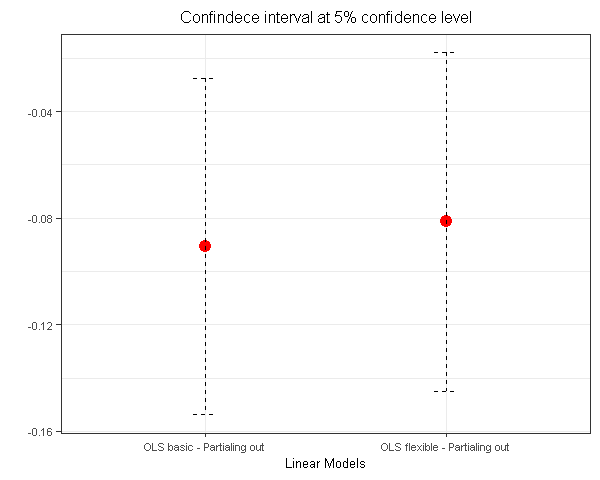

In [277]:
options(repr.plot.width = 5, repr.plot.height =4)  # plot size 

ggplot(tab, aes(x=rownames(tab), y=Estimate)) +
    geom_point(size=3, color="red") + 
    geom_errorbar(aes(ymin=lower_bound, ymax=upper_bound) , width = 0.1,color="black", linetype="dashed", size=0.5) +
  labs(x="Linear Models", y="") + ggtitle("Confindece interval at 5% confidence level") +
  theme_bw()  + theme(text=element_text(size =8), plot.title = element_text(hjust = 0.5))